In [1]:
import numpy as np
import matplotlib.pyplot as plt
from graphstats import *
from scipy.stats import norm

In [5]:
n = [150, 200, 250, 300, 350, 400, 450, 500]
it = 100
seed_ratio = 0.1
pi1 = 0.5
pi2 = 1 - pi1
pis = np.array([pi1, pi2])
pi = pis

p = 0.52
q = 0.48

B = np.array([[p**2, p*q], [p*q, q**2]])

mu1 = 3
mu2 = 3

means = np.array([[mu1, mu2], [mu2, mu1]])
scales = []

ptr_poisson_ss = [[] for i in range(len(n))]
up_poisson_ss = [[] for i in range(len(n))]

for i in tqdm(range(len(n))):
    n1 = int(np.round(n[i]*seed_ratio*pi[0]))
    n2 = int(np.round(n[i]*seed_ratio*(1 - pi[0])))
    
    ns  = n1 + n2

    seeds1 = np.arange(0, n1)
    seeds2 = np.arange(int(np.round(n[i]*pi[0])), int(np.round(n[i]*pi[0])) + n2)
    all_seeds = np.concatenate((seeds1, seeds2))

    labels1 = np.zeros(len(seeds1))
    labels2 = np.ones(len(seeds2))
    seed_labels = np.concatenate((labels1, labels2))

    all_labels = np.concatenate((np.zeros(int(np.round(n[i]*pi[0]))), np.ones(int(np.round(n[i]*pi[1])))))
    
    for j in range(it):
        A = adj_matrix(n[i], pis, B, True, dist = "poisson", means = means, scales = scales, acorn = j)
        
        A_ptr = pass_to_ranks(A)
        V_ptr, U_ptr = adj_spectral_embedding(A_ptr, max_dim = 2, acorn = j)
        X_hat = V_ptr[:, :1]
        ptr_class = gaussian_classification(X_hat, all_seeds, seed_labels)
        
        C = strip_weights(A)
        V_C, U_C = adj_spectral_embedding(C, max_dim = 2, acorn = j)
        X_hat_C = V_C[:, :1]
        
        up_class = updated_priors_classification(X_hat_C, A, all_seeds, seed_labels, method = "ranks", acorn = j)
        
        ptr_poisson_ss[i].append((np.sum(ptr_class == all_labels) - ns)/(n[i] - ns))
        up_poisson_ss[i].append((np.sum(up_class == all_labels) - ns)/(n[i] - ns))

100%|██████████| 8/8 [12:59<00:00, 127.88s/it]


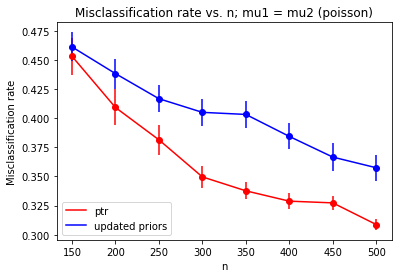

In [6]:
ptr_means = np.array([np.mean(i) for i in ptr_poisson_ss])
up_means = np.array([np.mean(i) for i in up_poisson_ss])

ptr_std = np.array([np.std(i, ddof = 1) for i in ptr_poisson_ss])
up_std = np.array([np.std(i, ddof = 1) for i in up_poisson_ss])

fig, ax = plt.subplots(1,1)

ax.plot(n, 1 - ptr_means, label = 'ptr', c = 'r')
ax.plot(n, 1 - up_means, label = 'updated priors', c = 'b')
ax.errorbar(n, 1 - ptr_means, yerr = 1.96*ptr_std/np.sqrt(it), fmt='o', c = 'r')
ax.errorbar(n, 1 - up_means, yerr = 1.96*up_std/np.sqrt(it), fmt='o', c = 'b')
ax.set_title('Misclassification rate vs. n; mu1 = mu2 (poisson)')
ax.set_xlabel('n')
ax.set_ylabel('Misclassification rate')
ax.legend(loc = 'lower left')

plt.savefig('poisson_ss.png')

In [7]:
n = [150, 200, 250, 300, 350, 400, 450, 500]
it = 100
seed_ratio = 0.1
pi1 = 0.5
pi2 = 1 - pi1
pis = np.array([pi1, pi2])
pi = pis

p = 0.52
q = 0.48

B = np.array([[p**2, p*q], [p*q, q**2]])

mu1 = 3
mu2 = 6

means = np.array([[mu1, mu2], [mu2, mu1]])
scales = []

ptr_poisson_dd = [[] for i in range(len(n))]
up_poisson_dd = [[] for i in range(len(n))]

for i in tqdm(range(len(n))):
    n1 = int(np.round(n[i]*seed_ratio*pi[0]))
    n2 = int(np.round(n[i]*seed_ratio*(1 - pi[0])))
    
    ns  = n1 + n2

    seeds1 = np.arange(0, n1)
    seeds2 = np.arange(int(np.round(n[i]*pi[0])), int(np.round(n[i]*pi[0])) + n2)
    all_seeds = np.concatenate((seeds1, seeds2))

    labels1 = np.zeros(len(seeds1))
    labels2 = np.ones(len(seeds2))
    seed_labels = np.concatenate((labels1, labels2))

    all_labels = np.concatenate((np.zeros(int(np.round(n[i]*pi[0]))), np.ones(int(np.round(n[i]*pi[1])))))
    
    for j in range(it):
        A = adj_matrix(n[i], pis, B, True, dist = "poisson", means = means, scales = scales, acorn = j)
        
        A_ptr = pass_to_ranks(A)
        V_ptr, U_ptr = adj_spectral_embedding(A_ptr, max_dim = 2, acorn = j)
        X_hat = V_ptr[:, :1]
        ptr_class = gaussian_classification(X_hat, all_seeds, seed_labels)
        
        C = strip_weights(A)
        V_C, U_C = adj_spectral_embedding(C, max_dim = 2, acorn = j)
        X_hat_C = V_C[:, :1]
        
        up_class = updated_priors_classification(X_hat_C, A, all_seeds, seed_labels, method = "ranks", acorn = j)
        
        ptr_poisson_dd[i].append((np.sum(ptr_class == all_labels) - ns)/(n[i] - ns))
        up_poisson_dd[i].append((np.sum(up_class == all_labels) - ns)/(n[i] - ns))

100%|██████████| 8/8 [12:43<00:00, 122.12s/it]


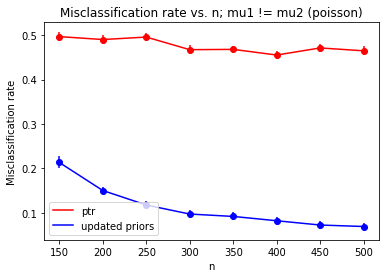

In [8]:
ptr_means = np.array([np.mean(i) for i in ptr_poisson_dd])
up_means = np.array([np.mean(i) for i in up_poisson_dd])

ptr_std = np.array([np.std(i, ddof = 1) for i in ptr_poisson_dd])
up_std = np.array([np.std(i, ddof = 1) for i in up_poisson_dd])

fig, ax = plt.subplots(1,1)

ax.plot(n, 1 - ptr_means, label = 'ptr', c = 'r')
ax.plot(n, 1 - up_means, label = 'updated priors', c = 'b')
ax.errorbar(n, 1 - ptr_means, yerr = 1.96*ptr_std/np.sqrt(it), fmt='o', c = 'r')
ax.errorbar(n, 1 - up_means, yerr = 1.96*up_std/np.sqrt(it), fmt='o', c = 'b')
ax.set_title('Misclassification rate vs. n; mu1 != mu2 (poisson)')
ax.set_xlabel('n')
ax.set_ylabel('Misclassification rate')
ax.legend(loc = 'lower left')

plt.savefig('poisson_dd.png')